## Análisis gráfico

### Importación de librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import yaml
import os


### Warnings y display de la dataframe

In [2]:
pd.set_option("max_colwidth", 50)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [3]:
import warnings

warnings.filterwarnings("ignore")

### Importación de dataframes

In [4]:
directorio_actual = os.getcwd()

In [5]:
df = pd.read_csv(os.path.join(directorio_actual, '..', 'data','processed', 'df.csv'))
df_num = pd.read_csv(os.path.join(directorio_actual, '..', 'data','processed', 'df_num.csv'))

### Importación de modelos

In [6]:
directorio_actual = os.getcwd()

In [7]:
'''para cargar el modelo entrenado'''
with open(os.path.join(directorio_actual, '..', 'models','modelo_final_GBR.pkl'), 'rb') as file:
    modelo_GBR = pickle.load(file)

### Análisis de las variables

<Axes: >

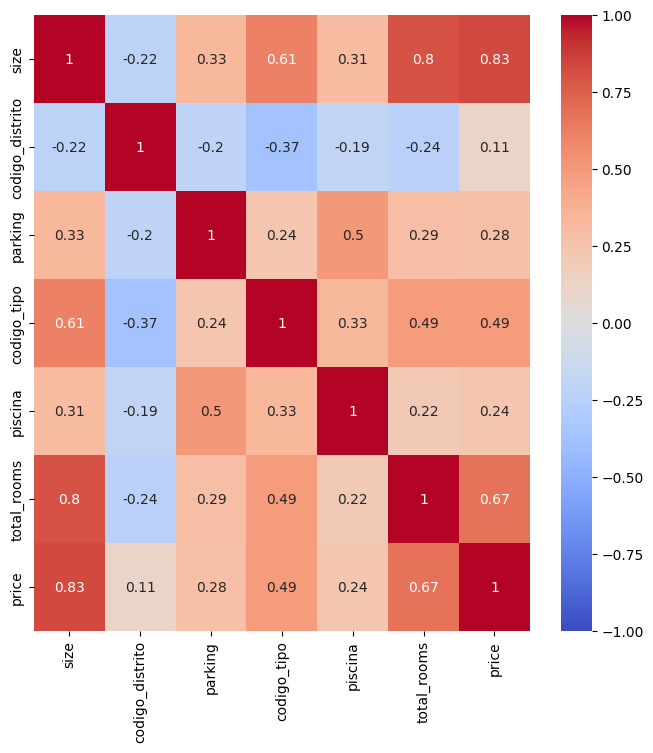

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(),annot=True,vmin=-1,cmap='coolwarm')

In [9]:
tipo_vivienda = {1 : 'Estudio',2: 'Piso',3: 'Adosada',4: 'Duplex',5: 'Atico',6: 'Pareada',7: 'Independiente'}

In [10]:
df_num['tipo_vivienda'] = df_num['codigo_tipo'].map(tipo_vivienda)

In [11]:
df_num

,size,codigo_distrito,parking,codigo_tipo,piscina,total_rooms,price,tipo_vivienda
0,66.0,25,0,2,0,3,590.0,Piso
1,85.0,70,0,2,0,4,800.0,Piso
2,41.0,48,0,2,0,2,650.0,Piso
3,40.0,70,0,2,0,2,650.0,Piso
4,256.0,17,0,7,0,6,1000.0,Independiente
...,...,...,...,...,...,...,...,...
986,84.0,6,1,2,0,5,500.0,Piso
987,83.0,6,0,2,0,4,600.0,Piso
988,130.0,6,0,3,0,4,600.0,Adosada
989,102.0,6,0,2,0,5,800.0,Piso


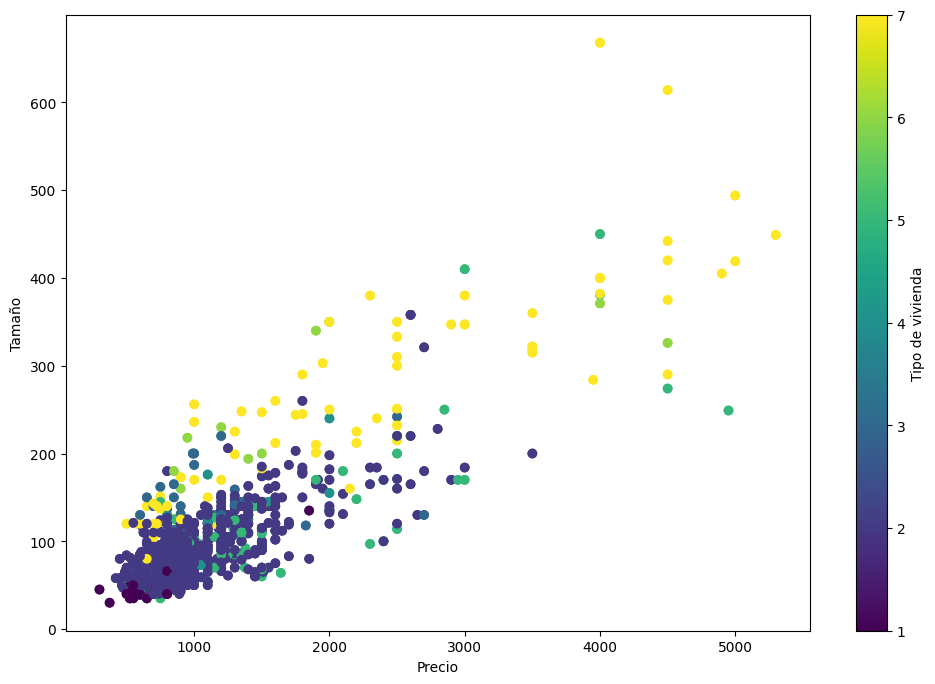

In [12]:
plt.figure(figsize=(12, 8))
plt.scatter(df_num['price'], df_num['size'], c=df_num['codigo_tipo'], cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Tamaño')
cbar = plt.colorbar(plt.scatter(df_num['price'], df_num['size'], c=df_num['codigo_tipo'], cmap='viridis'))
cbar.set_label('Tipo de vivienda')

En esta gráfica, analizamos la correlación de 2 variables, tipo de vivienda y tamaño y podemos ver que entre ambas y el precio, efectivamente existe correlación.

In [13]:
df[['precio_area / distrito','latitude','longitude',]]

,precio_area / distrito,latitude,longitude
0,8.200000,37.284635,-5.925679
1,13.694444,37.388130,-5.963097
2,9.947368,37.396532,-5.976552
3,13.694444,37.377477,-5.961966
4,7.666667,37.349163,-5.935799
...,...,...,...
986,6.217391,37.175795,-5.786509
987,6.217391,37.179141,-5.775776
988,6.217391,37.184088,-5.772710
989,6.217391,37.184312,-5.773903


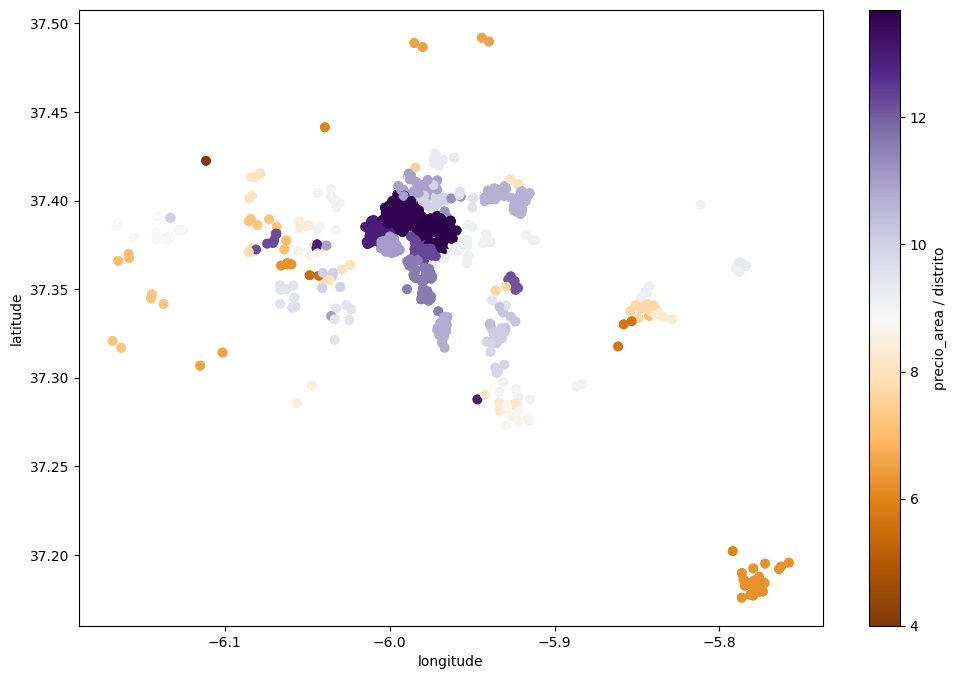

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['precio_area / distrito'], cmap='PuOr')
plt.xlabel('longitude')
plt.ylabel('latitude')
cbar = plt.colorbar(plt.scatter(df['longitude'], df['latitude'], c=df['precio_area / distrito'], cmap='PuOr'))
cbar.set_label('precio_area / distrito')

En esta gráfica, donde analizamos el precio de area/distrito, vemos claramente que los distritos mas céntricos, tiene un precio/area mucho mas elevado. Tambien podemos ver algunos precios bastantes elevados en la zona del aljarafe, donde últimamente los precios se han disparado y otras zonas con urbanizaciones privadas que también tienen altos precios

In [15]:
df_num

,size,codigo_distrito,parking,codigo_tipo,piscina,total_rooms,price,tipo_vivienda
0,66.0,25,0,2,0,3,590.0,Piso
1,85.0,70,0,2,0,4,800.0,Piso
2,41.0,48,0,2,0,2,650.0,Piso
3,40.0,70,0,2,0,2,650.0,Piso
4,256.0,17,0,7,0,6,1000.0,Independiente
...,...,...,...,...,...,...,...,...
986,84.0,6,1,2,0,5,500.0,Piso
987,83.0,6,0,2,0,4,600.0,Piso
988,130.0,6,0,3,0,4,600.0,Adosada
989,102.0,6,0,2,0,5,800.0,Piso


In [16]:
grupo_precios = df_num.groupby(['piscina', 'parking'])['price'].mean().reset_index()

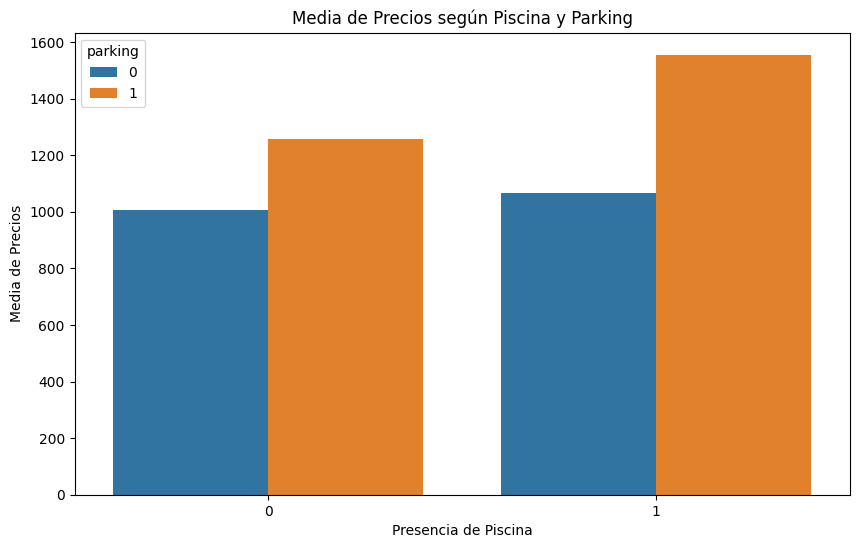

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='piscina', y='price', hue='parking', data=grupo_precios, ci=None)
plt.title('Media de Precios según Piscina y Parking')
plt.xlabel('Presencia de Piscina')
plt.ylabel('Media de Precios')
plt.show()

En este gráfico, donde analizamos las viviendas con parking y piscina, podemos ver:
- Que tenga parking o no, si que vemos que afecta bastante en la media de los precios de las viviendas.
- Parece, que teniendo parking, la diferencia de tener piscina o no es bastante significativa. 
- En cambio, cuando no hay parking, el hecho de tener o no piscina, parece que no influye. Esto se debe a que la mayoria de pisos céntricos no tienen parking ni piscina, pero al tener un precio mas elevado, la media de precios prácticamente se iguala.

### Análisis de las predicciones

In [18]:
X = df_num.drop(['price','tipo_vivienda'],axis=1)
y = df_num['price']

In [19]:
prediction = modelo_GBR.predict(X)

In [20]:
analisis_prediction = pd.DataFrame({'test_real':y,'prediccion':prediction})

In [21]:
analisis_prediction['error'] = analisis_prediction['test_real'] - analisis_prediction['prediccion']


In [22]:
analisis_prediction = pd.concat([analisis_prediction,X], axis=1)

In [23]:
analisis_prediction.sort_values(by='error',ascending=False)

,test_real,prediccion,error,size,codigo_distrito,parking,codigo_tipo,piscina,total_rooms
919,2650.0,1685.049607,964.950393,130.0,69,0,2,0,4
958,1600.0,1005.288756,594.711244,75.0,69,0,2,0,3
923,2700.0,2255.046285,444.953715,130.0,69,0,3,0,5
912,2000.0,1601.535519,398.464481,135.0,60,0,2,0,5
947,1500.0,1102.279371,397.720629,90.0,69,0,2,0,4
...,...,...,...,...,...,...,...,...,...
836,700.0,962.107512,-262.107512,86.0,69,0,2,0,3
346,900.0,1168.880771,-268.880771,120.0,69,0,4,0,4
500,900.0,1172.229946,-272.229946,86.0,66,0,2,0,5
775,950.0,1236.683515,-286.683515,123.0,69,0,2,0,5


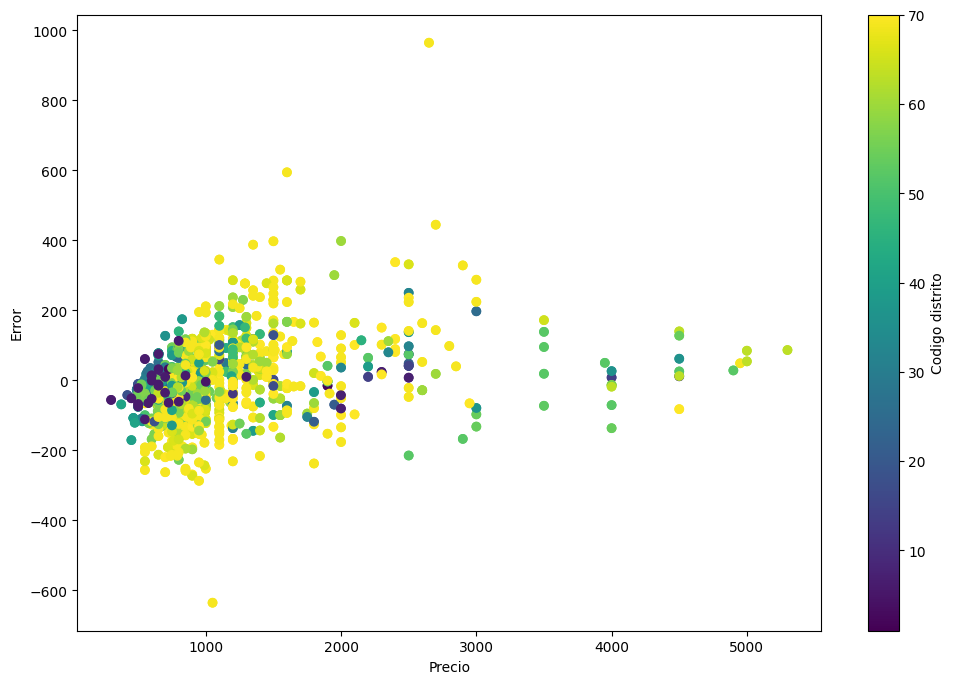

In [24]:
plt.figure(figsize=(12, 8))
plt.scatter(analisis_prediction['test_real'], analisis_prediction['error'], c=analisis_prediction['codigo_distrito'], cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Error')
cbar = plt.colorbar(plt.scatter(analisis_prediction['test_real'], analisis_prediction['error'], c=analisis_prediction['codigo_distrito'], cmap='viridis'))
cbar.set_label('Codigo distrito')

En esta gráfica, donde analizamos los errores de las predicciones obtenidas,vemos que los errores mas significativos son en distritos donde el precio medio/area es mucho más elevado, seguramente céntricos, donde habría que analizar que tipo de viviendas son, ya que pueden ser viviendas de lujos cuyos precios se disparan y en ese caso estaríamos hablando de outliers de los cuales prescindiríamos. También si llevan mucho tiempo en alquiler o si le han puesto un precio mas bajo debido a la necesidad de alquilar.

Por tanto, sería positivo tener el tiempo que lleva cada vivienda en alquiler.

No obstante, con esta aplicación, predecimos el precio de alquiler de una vivienda dadas unas características sin ninguna subjetividad.

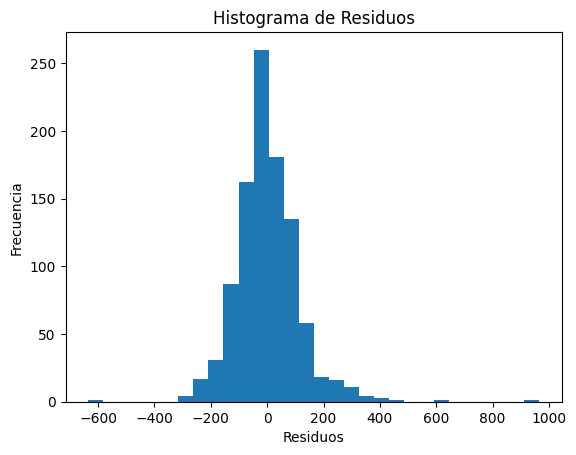

In [32]:
plt.hist(analisis_prediction['error'], bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()